In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input

In [3]:
titanic = pd.read_csv("/content/Titanic.csv")

print(titanic.head(4))


   pclass  survived                                  name     sex    age  \
0       1         1         Allen, Miss. Elisabeth Walton  female  29.00   
1       1         1        Allison, Master. Hudson Trevor    male   0.92   
2       1         0          Allison, Miss. Helen Loraine  female   2.00   
3       1         0  Allison, Mr. Hudson Joshua Creighton    male  30.00   

   sibsp  parch  ticket      fare    cabin embarked boat   body  \
0      0      0   24160  211.3375       B5        S    2    NaN   
1      1      2  113781  151.5500  C22 C26        S   11    NaN   
2      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3      1      2  113781  151.5500  C22 C26        S  NaN  135.0   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  


In [7]:
# Select relevant features and target
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'

titanic = titanic[features + [target]]

# Handle missing values
titanic['age'].fillna(titanic['age'].median())
titanic['embarked'].fillna(titanic['embarked'].mode()[0])


,embarked
0,2
1,2
2,2
3,2
4,2
...,...
1301,0
1304,0
1306,0
1307,0


In [9]:
titanic.dropna(inplace=True)

# Convert categorical variables
label_enc = LabelEncoder()
titanic['sex'] = label_enc.fit_transform(titanic['sex'])
titanic['embarked'] = label_enc.fit_transform(titanic['embarked'])


# Split data
X = titanic[features]
y = titanic[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [10]:
# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:

# Build neural network model
model = keras.Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicit input layer
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4607 - loss: 0.7060 - val_accuracy: 0.6268 - val_loss: 0.6562
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6822 - loss: 0.6301 - val_accuracy: 0.6986 - val_loss: 0.6116
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7026 - loss: 0.5878 - val_accuracy: 0.7033 - val_loss: 0.5794
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7297 - loss: 0.5507 - val_accuracy: 0.7416 - val_loss: 0.5555
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7530 - loss: 0.5224 - val_accuracy: 0.7608 - val_loss: 0.5356
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7710 - loss: 0.5015 - val_accuracy: 0.7560 - val_loss: 0.5232
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7713 - loss: 0.4844 - val_accuracy: 0.7512 - val_loss: 0.5157
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8025 - loss: 0.4688 - val_accuracy: 0.7512 - val_loss:

In [12]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to binary outcomes


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [13]:
# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [15]:
# Calculate performance metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)



# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Print evaluation metrics
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')
print(f'F1-score: {f1:.3f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Precision: 0.793
Recall: 0.548
F1-score: 0.648
Confusion Matrix:
[[113  12]
 [ 38  46]]


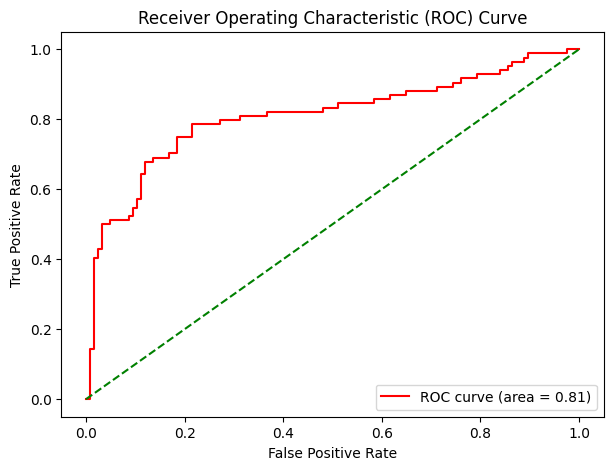

In [18]:
# Plot ROC Curve
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='red', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()